In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [5]:
df = pd.read_excel('Airbnb Data (Mini Project 1).xlsx')
df.head()

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,state,zipcode,country,...,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008,8/11,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,...,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008,9/24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,...,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008,10/19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,...,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008,11/30,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,...,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008,12/17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,...,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


In [3]:
df.isna().sum()

host_id                           0
host_name                         0
host_since_year                   0
host_since_anniversary            0
id                                0
neighbourhood_cleansed            0
city                              0
state                             8
zipcode                         173
country                           0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        69
bedrooms                         14
beds                             13
bed_type                          0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
host_response_time              732
host_response_rate              732
number_of_reviews                 0
review_scores_rating           1698
review_scores_accuracy      

In [4]:
fill_list = ['bathrooms','bedrooms','beds','review_scores_rating','host_response_time','host_response_rate']

for element in fill_list:
    print(df[element].value_counts(dropna=False))

1.0    6508
1.5     689
2.0     371
NaN      69
0.5      67
3.0      37
2.5      34
0.0      33
4.0      10
5.0       6
8.0       5
3.5       3
7.5       1
Name: bathrooms, dtype: int64
1.0     4943
2.0     1840
3.0      488
0.0      343
4.0      136
5.0       39
NaN       14
6.0        9
10.0       7
9.0        6
7.0        5
8.0        3
Name: bedrooms, dtype: int64
1.0     4013
2.0     2180
3.0      620
4.0      584
6.0      157
5.0      149
16.0      34
8.0       29
7.0       25
NaN       13
9.0       11
10.0      10
12.0       3
14.0       3
15.0       2
Name: beds, dtype: int64
NaN      1698
100.0    1496
93.0      468
97.0      463
95.0      422
96.0      415
90.0      409
98.0      357
80.0      306
94.0      299
91.0      238
92.0      204
87.0      167
99.0      155
88.0      145
89.0      122
85.0       76
86.0       68
84.0       68
83.0       55
60.0       35
82.0       24
70.0       16
73.0       16
75.0       14
79.0       14
77.0       12
78.0       10
76.0        9
20.

In [5]:
df.drop(labels=['state','zipcode','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
               'review_scores_communication','review_scores_location','review_scores_value'],axis=1,inplace=True)
df.bathrooms.fillna(value=1.0,inplace=True) #Impute the mode
df.bedrooms.fillna(value=1.0,inplace=True) #Impute the mode
df.beds.fillna(value=1.0,inplace=True) #Impute the mode
df.review_scores_rating.fillna(value=0.0,inplace=True) #Fill 0 for lack of value
df.host_response_time.fillna(value = 'no response',inplace=True)
df.host_response_rate.fillna(value=0.0,inplace=True) #Fill 0 for lack of value
df.columns

Index(['host_id', 'host_name', 'host_since_year', 'host_since_anniversary',
       'id', 'neighbourhood_cleansed', 'city', 'country', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'host_response_time',
       'host_response_rate', 'number_of_reviews', 'review_scores_rating'],
      dtype='object')

What are the questions to be answered in the exploration of Airbnb dataframe?
1. What is the definition of a successful host?
2. How much revenue do successful hosts generate?
3. Which property types have more successful hosts?
4. Which neighbourhoods have more successful hosts?
5. How long will it take me to be a successful host?

What is the definition of a successsful host?

I am assuming that a successful host is one that has the following:
1. High number of reviews.
2. High ratings.

Lets plot scatterplot to see relationship between number of reviews vs price and number of reviews vs rating.

Text(0.5, 1.0, 'Test graph of price against number of reviews')

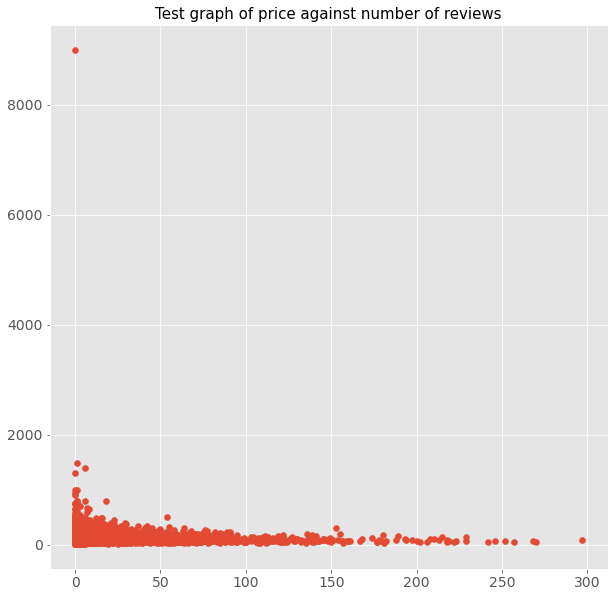

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(df.number_of_reviews,df.price)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Test graph of price against number of reviews",fontsize=15)

At this point, let's not continue further with this graph and get rid of the extreme point for better visualization.

In [7]:
df[df.price>8000]

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,country,latitude,longitude,...,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating
4092,7869128,Alex,2013,8/1,4405818,Westerpark,Amsterdam,Netherlands,52.37298,4.872573,...,1.0,Real Bed,9000,1,39,3,within an hour,1.0,0,0.0


In [8]:
dropped_df = df.drop([4092])

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

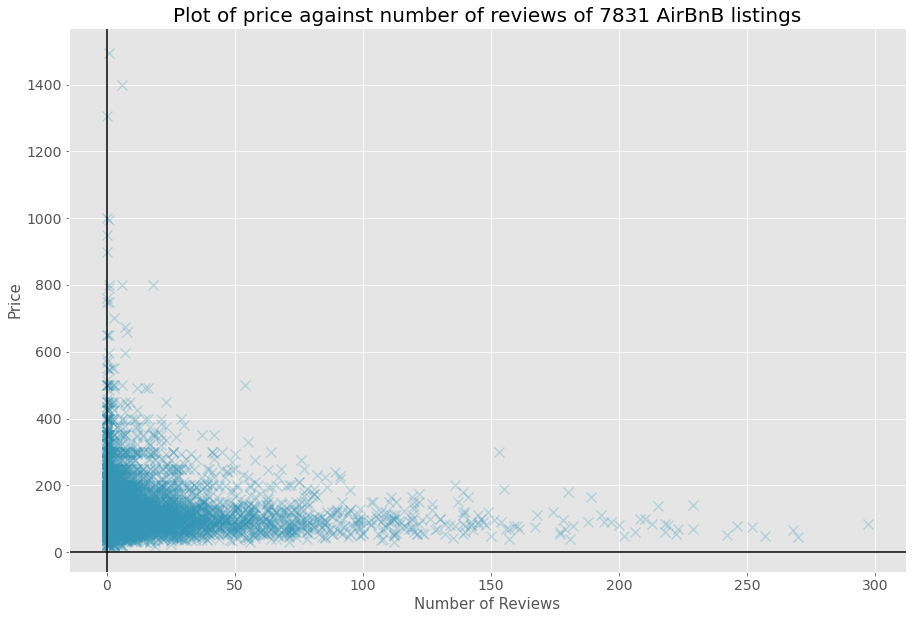

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(dropped_df.number_of_reviews,dropped_df.price,s=100,alpha=0.25,c='#3595B5',marker='x')
plt.title('Plot of price against number of reviews of 7831 AirBnB listings', fontsize=20)
plt.xlabel('Number of Reviews', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

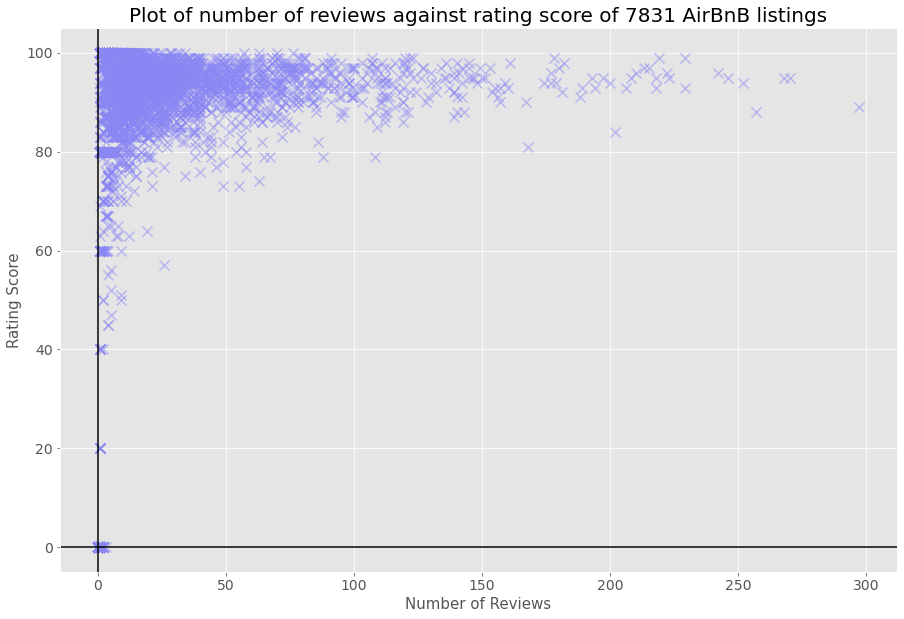

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(dropped_df.number_of_reviews,dropped_df.review_scores_rating,s=100,alpha=0.5,c='#8A87F5',marker= 'x')
plt.title('Plot of number of reviews against rating score of 7831 AirBnB listings', fontsize=20)
plt.xlabel('Number of Reviews', fontsize = 15)
plt.ylabel('Rating Score', fontsize = 15)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

What is the definition of a successful host? Let's set a criteria to take the of 25th percentile of Rating Score and Number of Reviews

In [11]:
percentile = 0.75
percentile_25 = df.quantile([percentile])
df_percentile = percentile_25[['number_of_reviews','review_scores_rating']]
high_reviews = df_percentile.loc[percentile,'number_of_reviews']
high_rating = df_percentile.loc[percentile,'review_scores_rating']

Let's filter the original dataframe with the above conditions.

In [12]:
df_high_rating = df[(df.review_scores_rating >= high_rating) & (df.number_of_reviews >= high_reviews)]
df_high_rating

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,country,latitude,longitude,...,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating
12,26919,Hugo,2009,7/22,98558,Centrum-Oost,Amsterdam,Netherlands,52.369596,4.899069,...,1.0,Real Bed,145,1,0,3,within an hour,1.00,19,99.0
13,32366,Sabine & Sander,2009,8/18,9693,Centrum-West,Amsterdam,Netherlands,52.378017,4.892703,...,1.0,Real Bed,132,2,30,4,within a day,0.90,34,99.0
15,42212,Miguel,2009,9/29,280105,Centrum-West,Amsterdam,Netherlands,52.380300,4.885144,...,2.0,Real Bed,180,1,65,2,within an hour,0.96,18,99.0
17,42725,Marco,2009,10/1,933385,De Baarsjes - Oud-West,Amsterdam,Netherlands,52.367614,4.866895,...,2.0,Real Bed,82,2,0,2,within a few hours,1.00,19,98.0
24,59059,Marius,2009,12/1,75583,Slotervaart,Amsterdam,Netherlands,52.365221,4.838338,...,2.0,Real Bed,35,1,30,2,within an hour,1.00,107,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,19947214,Roeland,2014,8/13,3864342,De Pijp - Rivierenbuurt,Amsterdam,Netherlands,52.353632,4.889189,...,2.0,Real Bed,120,1,25,2,within an hour,1.00,19,98.0
6911,21725610,Hadewych,2014,9/24,4187658,Centrum-West,Amsterdam,Netherlands,52.369560,4.881757,...,3.0,Real Bed,275,2,20,2,within a few hours,0.91,19,98.0
7025,22504763,Vanda,2014,10/13,4334364,Centrum-Oost,Amsterdam,Netherlands,52.362818,4.906078,...,2.0,Real Bed,135,2,20,2,within a few hours,1.00,22,98.0
7143,23368172,Brian,2014,11/5,4506195,Bos en Lommer,Amsterdam,Netherlands,52.379135,4.845423,...,1.0,Real Bed,70,1,0,2,within a few hours,0.92,16,98.0


In [14]:
df_high_rating.review_scores_rating.min(), df_high_rating.number_of_reviews.min()

(98.0, 15)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

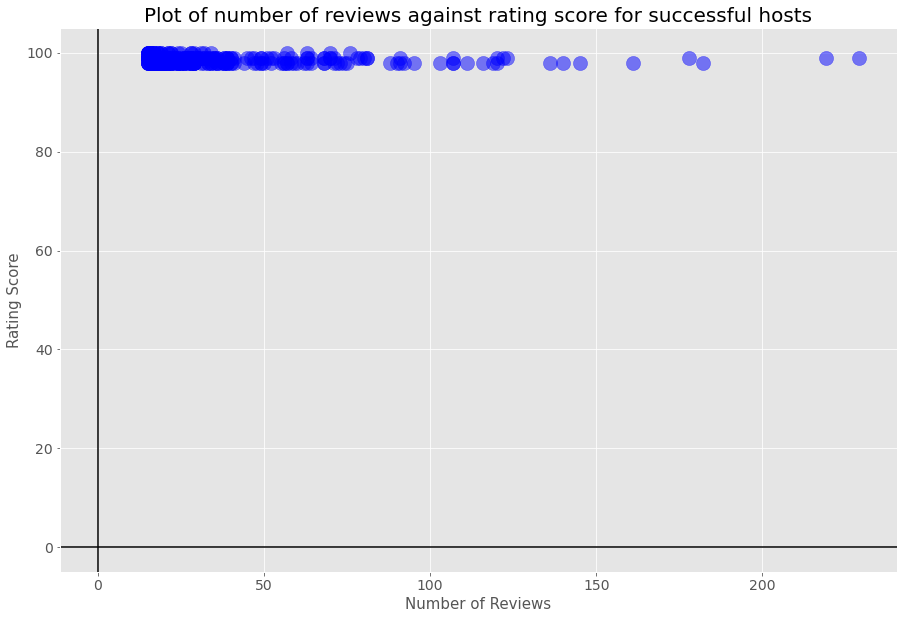

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(df_high_rating.number_of_reviews,df_high_rating.review_scores_rating,s=200,alpha=0.5,c='blue',marker= 'o')
plt.title('Plot of number of reviews against rating score for successful hosts', fontsize=20)
plt.xlabel('Number of Reviews', fontsize = 15)
plt.ylabel('Rating Score', fontsize = 15)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(97.5, 100.5)

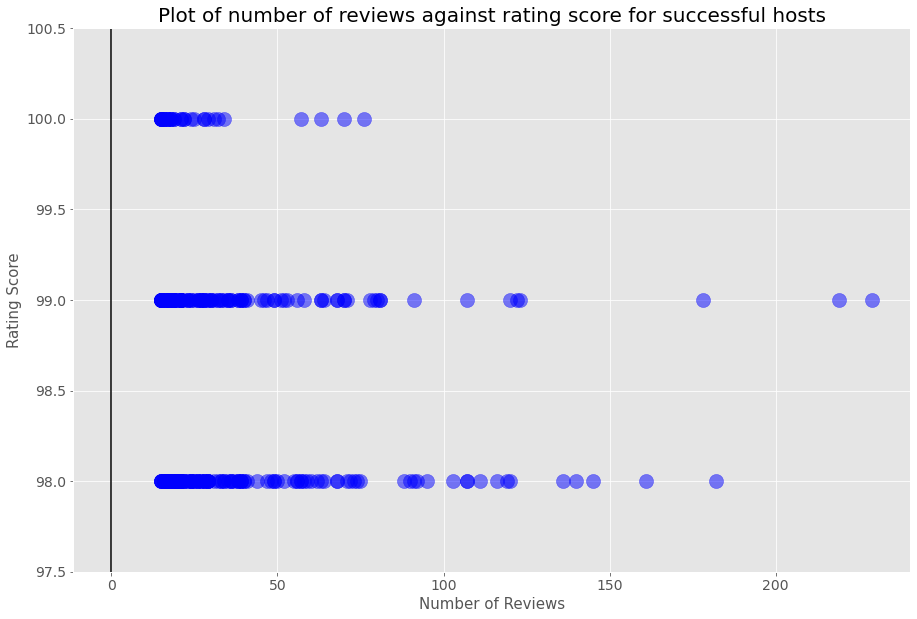

In [15]:
plt.figure(figsize=(15,10))
plt.scatter(df_high_rating.number_of_reviews,df_high_rating.review_scores_rating,s=200,alpha=0.5,c='blue',marker= 'o')
plt.title('Plot of number of reviews against rating score for successful hosts', fontsize=20)
plt.xlabel('Number of Reviews', fontsize = 15)
plt.ylabel('Rating Score', fontsize = 15)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim((97.5,100.5))

We can now obtain the median price of these successful hosts.

<ipython-input-16-97f0c3beb94d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_rating['price_per_bedroom'] = df_high_rating['price'] / df_high_rating['bedrooms']


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

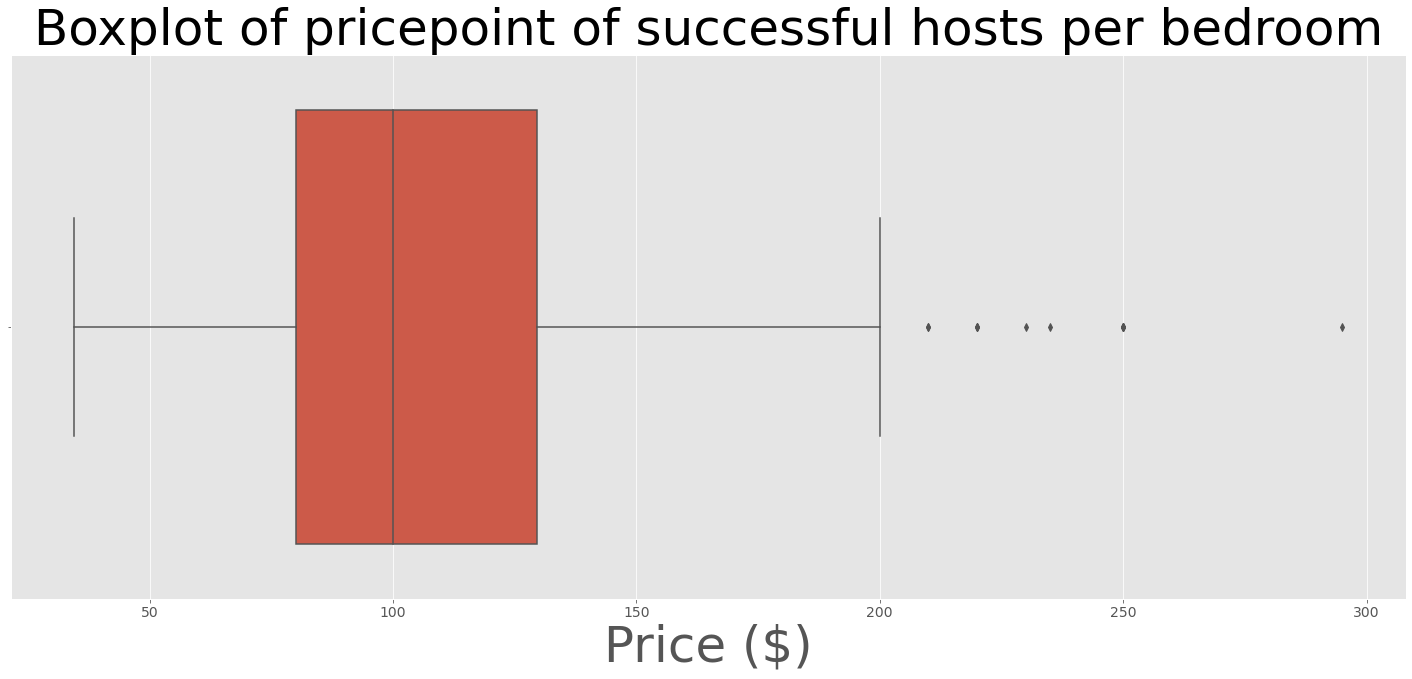

In [16]:
df_high_rating['price_per_bedroom'] = df_high_rating['price'] / df_high_rating['bedrooms']
plt.figure(figsize=(25,10))
sns.boxplot(x=df_high_rating.price_per_bedroom)
plt.xlabel('Price ($)',fontsize=50)
plt.title("Boxplot of pricepoint of successful hosts per bedroom",fontsize=50)
plt.xticks(fontsize=14)

Let's visualize the boxplot by removing the extreme points above $300

In [17]:
print("A successful host will typically obtain ${amount:.2f} per person per day of visit.".format(amount=np.median(df_high_rating.price_per_bedroom)))

A successful host will typically obtain $100.00 per person per day of visit.


Let's define a few functions that will help us answer the following questions:

1. Which property types have more successful hosts?
1. Which neighbourhoods have more successful hosts?

`sum_types` will return a dictionary containing 2 entries: our variable of interest and all occurances of entries that are not our variable of interest.

`calculate_prop` function take in the returned dictionary from `sum_types` and will return the proportion of our variable of interest and the proportion of variables that are not of our interest.

`print_summary` takes in 2 dictionary and the target variable and will put them through `sum_types` and `calculate_prop` in 1 function.

`get_sorted_dictionary` returns a sorted dictionary according to the value.

`test_statistic` returns the upper and lowerbound and mean of the occurances of a target variable.

`get_dict_by_successful_host` Obtain dictaionry of value counts from the high rating dataframe and entire dataframe.

In [18]:
def sum_types(dictionary,target_variable):
    result = {}
    not_target_variable = 'Not {variable_type}'.format(variable_type = target_variable)
    result[not_target_variable] = 0
    for key in dictionary:
        if key != target_variable:
            result[not_target_variable] = result[not_target_variable] + dictionary[key]
        else:
            result[target_variable] = dictionary[key]
    return result

def calculate_prop(high_rating_prop,regular_prop,target_variable):
    not_target_variable = 'Not {variable_type}'.format(variable_type = target_variable)
    target_variable_prop = high_rating_prop[target_variable] / regular_prop[target_variable]
    not_target_prop = high_rating_prop[not_target_variable] / regular_prop[not_target_variable]
    return target_variable_prop, not_target_prop


def print_summary(high_rating,regular,target_variable):
    high_summary = sum_types(high_rating,target_variable)
    reg_summary = sum_types(regular,target_variable)
    return high_summary, reg_summary, calculate_prop(high_summary,reg_summary,target_variable)

def get_sorted_dictionary(dictionary,reverse=True):
    sorted_dict = {}
    for key in sorted(dictionary, key=dictionary.get, reverse=reverse):
        sorted_dict[key] = dictionary[key]
    return sorted_dict

def test_statistic(high_rating,all_listing,proportion,target_variable,z_score=1.96):
    not_target_variable = 'Not {variable_type}'.format(variable_type = target_variable)
    p_high_rating = proportion[0]
    p_all_listing = proportion[1]
    var_high_rating = (p_high_rating * (1-p_high_rating)) / all_listing[target_variable]
    var_all_listing = (p_all_listing * (1-p_all_listing)) / all_listing[not_target_variable]
    std = (var_high_rating + var_all_listing)**0.5
    mean = p_high_rating - p_all_listing
    upperbound = mean + (z_score * std)
    lowerbound = mean - (z_score * std)
    return upperbound,lowerbound,mean

def get_dict_by_successful_host(successful_df,df,column):
    return dict(successful_df[column].value_counts()), dict(df[column].value_counts())

These functions will be helping us to segregate data from the high rating dataframe and the original dataframe.

It also calculate the proportion of the variable in the high rating dataframe and the original dataframe and print a summary of the values.

Firstly, lets look at which property types have more successful hosts.

In [19]:
high_rating_properties = df_high_rating.groupby('property_type')['price'].count()
high_rating_properties

property_type
Apartment          256
Bed & Breakfast     13
Boat                29
House               16
Loft                 1
Name: price, dtype: int64

At first glance, it may seem that the property type, 'Aparment', has the most successful hosts, but we should also look at the total number of 'Apartment'.

In [20]:
all_properties = df.groupby('property_type')['price'].count()
all_properties

property_type
Apartment          6280
Bed & Breakfast     370
Boat                327
Cabin                12
Camper/RV            11
Chalet                1
Dorm                  2
Earth House           1
House               711
Hut                   1
Loft                 77
Other                29
Treehouse             1
Villa                 8
Yurt                  2
Name: price, dtype: int64

As suspected, the 'Apartment' property type has the most number of occurances.

Let's use the pre-defined functions to obtain the proportion of property types instead.

In [21]:
high_rating_proportion, population_proportion = get_dict_by_successful_host(df_high_rating,df,'property_type')
num_listings = len(df)
num_successful = len(df_high_rating)
apartment_type_diff = {'All listings':(num_successful/num_listings*100)}
for key in high_rating_proportion:
    high_summary, reg_summary, proportion = print_summary(high_rating_proportion,population_proportion,key)
    apartment_type_diff[key] = proportion[0] * 100
    print("""Summary statistic-- {dict1} {dict2}
    The percentage of high rating {key} as a portion of all {key}s is {proportion0:.2f}%
    The pecentage of high rating 'Not {key}' as a portion of all 'Not {key}s' is {proportion1:.2f}%"""
          .format(dict1=high_summary,
                  dict2=reg_summary,
                  key=key,
                  proportion0=proportion[0]*100,
                  proportion1=proportion[1]*100))

Summary statistic-- {'Not Apartment': 59, 'Apartment': 256} {'Not Apartment': 1553, 'Apartment': 6280}
    The percentage of high rating Apartment as a portion of all Apartments is 4.08%
    The pecentage of high rating 'Not Apartment' as a portion of all 'Not Apartments' is 3.80%
Summary statistic-- {'Not Boat': 286, 'Boat': 29} {'Not Boat': 7506, 'Boat': 327}
    The percentage of high rating Boat as a portion of all Boats is 8.87%
    The pecentage of high rating 'Not Boat' as a portion of all 'Not Boats' is 3.81%
Summary statistic-- {'Not House': 299, 'House': 16} {'Not House': 7122, 'House': 711}
    The percentage of high rating House as a portion of all Houses is 2.25%
    The pecentage of high rating 'Not House' as a portion of all 'Not Houses' is 4.20%
Summary statistic-- {'Not Bed & Breakfast': 302, 'Bed & Breakfast': 13} {'Not Bed & Breakfast': 7463, 'Bed & Breakfast': 370}
    The percentage of high rating Bed & Breakfast as a portion of all Bed & Breakfasts is 3.51%
    Th

Text(0.5, 1.0, 'Occurance of successful host for each property type')

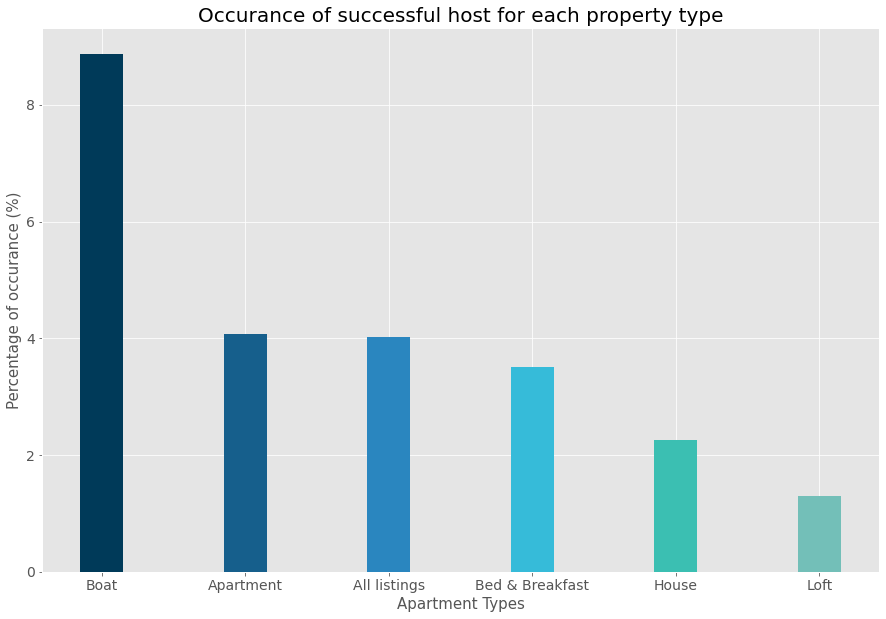

In [22]:
sorted_apartment_type_diff = get_sorted_dictionary(apartment_type_diff)
height=sorted_apartment_type_diff.values()
plt.figure(figsize=(15,10))
colors = ['#003A59','#165F8C','#2A86BF','#36BBD9','#3BBFB2','#73BFB8']
plt.bar(sorted_apartment_type_diff.keys(),height=height,width=0.3,color=colors)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Apartment Types',fontsize=15)
plt.ylabel('Percentage of occurance (%)',fontsize=15)
plt.title('Occurance of successful host for each property type',fontsize=20)

While we can see the the percentage of Boat has a higher occurance in `df_high_rating`, let us see if we can perform some statistical test to extract any meaningful information.

We have a predefined function called `test_statistic` that allows us to compare occurance in population proportions.

Null hypothesis: Occurance of successful boat listing is the same as all successful non-boat listings.

Alternative hypothesis: Occurance of successful boat listing is **not** the same as all successful non-boat listings.

In [23]:
high_rating_boat, reg_boat, boat_proportion = print_summary(high_rating_proportion,population_proportion,'Boat')
boat_upperbound,boat_lowerbound,boat_mean = test_statistic(high_rating_boat, reg_boat, boat_proportion,'Boat')
boat_upperbound,boat_lowerbound,boat_mean

(0.08169859542186299, 0.019465733054194093, 0.05058216423802854)

The difference between the occurance of `Boat` property type and all other property types is 0.0506 with a 95% confidence interval between 0.0195 to 0.0817. Let's see how this compares to the other property types.

In [24]:
for key in high_rating_proportion:
    prop_high, prop_not_high,proportion = print_summary(high_rating_proportion,population_proportion,key)
    upperbound, lowerbound, mean = test_statistic(prop_high, prop_not_high, proportion,key)
    print('For {key} the upperbound is {upperbound}, the lowerbound is {lowerbound} and the mean is {mean}'
          .format(key=key,
                 upperbound=upperbound,
                 lowerbound=lowerbound,
                 mean=mean))

For Apartment the upperbound is 0.013465702376350598, the lowerbound is -0.007919010335878286 and the mean is 0.002773346020236156
For Boat the upperbound is 0.08169859542186299, the lowerbound is 0.019465733054194093 and the mean is 0.05058216423802854
For House the upperbound is -0.007623816584734369, the lowerbound is -0.03133432938715756 and the mean is -0.019479072985945964
For Bed & Breakfast the upperbound is 0.013955298088625803, the lowerbound is -0.02461762864912063 and the mean is -0.005331165280247414
For Loft the upperbound is -0.0018314578248531423, the lowerbound is -0.05316408814542206 and the mean is -0.027497772985137604


All other property types occur less frequently in the successful listings except Apartment and Boat. However, for the 'Apartment' property type, the mean is out of the lowerbound of the confidence interval indicating that it could by by chance that it occured more frequently in the successful listings.

Since we have come to the conclusion that the 'Boat' property type is more likely to be successful, let us also look at the revenue generated per successful property type.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Loft'),
  Text(1, 0, 'Boat'),
  Text(2, 0, 'Apartment'),
  Text(3, 0, 'House'),
  Text(4, 0, 'Bed & Breakfast')])

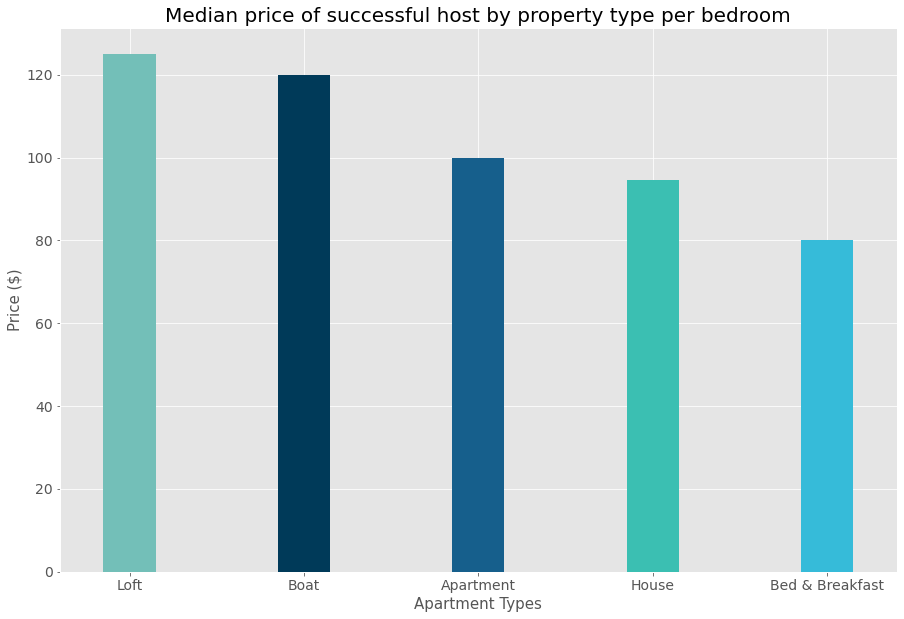

In [27]:
property_prices = df_high_rating.groupby('property_type')['price_per_bedroom'].median()
sorted_property_prices = property_prices.sort_values(ascending=False)
plt.figure(figsize=(15,10))
colors = ['#73BFB8','#003A59','#165F8C','#3BBFB2','#36BBD9']
sorted_property_prices.plot.bar(color=colors,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Apartment Types',fontsize=15)
plt.ylabel('Price ($)',fontsize=15)
plt.title('Median price of successful host by property type per bedroom',fontsize=20)
plt.xticks(rotation=0)

120.0

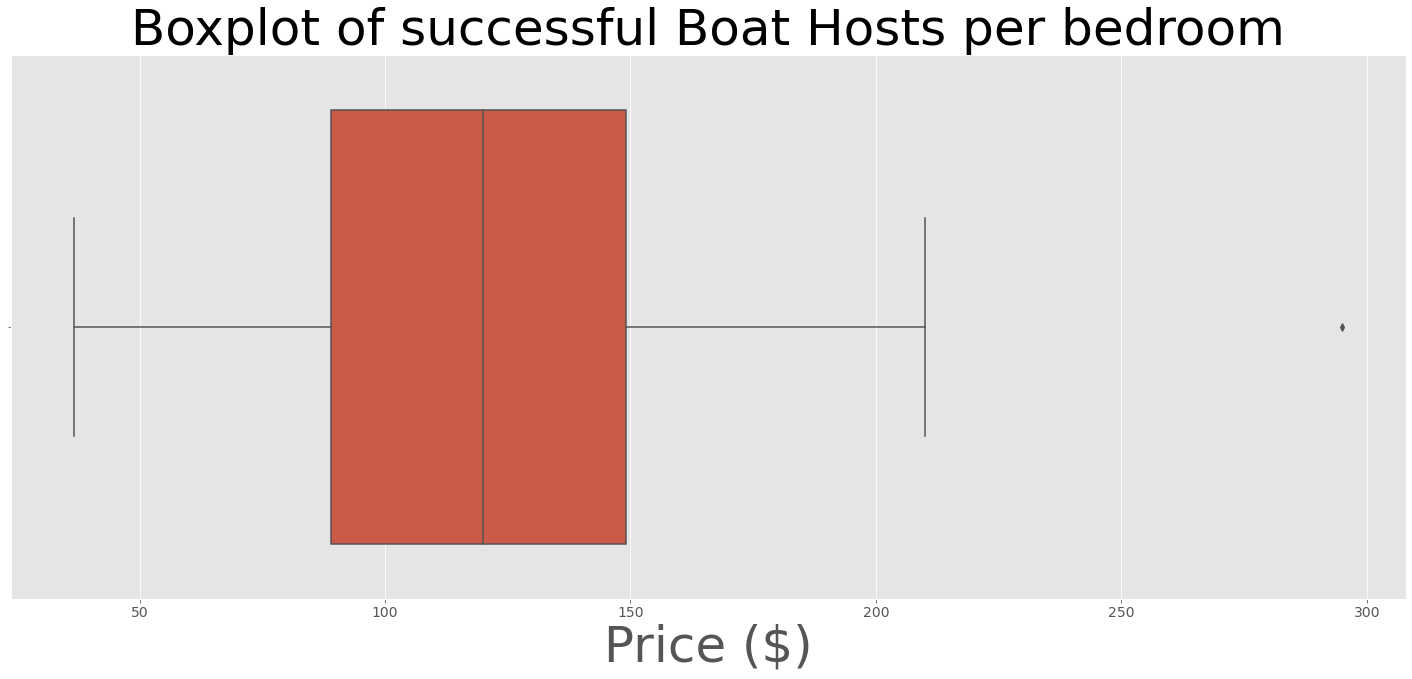

In [28]:
plt.figure(figsize=(25,10))
boxplot_boat_data = df_high_rating[df_high_rating.property_type == 'Boat'].price_per_bedroom
sns.boxplot(x=boxplot_boat_data)
plt.xlabel('Price ($)',fontsize=50)
plt.title("Boxplot of successful Boat Hosts per bedroom" ,fontsize=50)
plt.xticks(fontsize=14)
boxplot_boat_data.median()

Let us now see which neighbourhoods have more successful hosts.

In [29]:
neighbourhood_high_rating, neighbourhood_regular_rating = get_dict_by_successful_host(df_high_rating,
                                                                                      df,'neighbourhood_cleansed')
neighbourhood_high_rating, neighbourhood_regular_rating

({'Centrum-West': 95,
  'Centrum-Oost': 47,
  'De Baarsjes - Oud-West': 47,
  'De Pijp - Rivierenbuurt': 37,
  'Zuid': 16,
  'Westerpark': 16,
  'Oostelijk Havengebied - Indische Buurt': 16,
  'Oud-Oost': 11,
  'Bos en Lommer': 9,
  'Slotervaart': 6,
  'IJburg - Zeeburgereiland': 5,
  'Oud-Noord': 3,
  'Watergraafsmeer': 3,
  'Osdorp': 2,
  'Noord-Oost': 1,
  'Buitenveldert - Zuidas': 1},
 {'Centrum-West': 1426,
  'De Baarsjes - Oud-West': 1203,
  'Centrum-Oost': 920,
  'De Pijp - Rivierenbuurt': 906,
  'Westerpark': 689,
  'Zuid': 579,
  'Oud-Oost': 410,
  'Bos en Lommer': 339,
  'Oostelijk Havengebied - Indische Buurt': 338,
  'Oud-Noord': 206,
  'Watergraafsmeer': 179,
  'Slotervaart': 142,
  'IJburg - Zeeburgereiland': 101,
  'Buitenveldert - Zuidas': 84,
  'Noord-West': 72,
  'Geuzenveld - Slotermeer': 58,
  'Noord-Oost': 47,
  'De Aker - Nieuw Sloten': 42,
  'Osdorp': 41,
  'Bijlmer-Centrum': 24,
  'Bijlmer-Oost': 17,
  'Gaasperdam - Driemond': 10})

Text(0.5, 1.0, 'Occurance of successful host for each neighbourhood \n as a proportion of all 7833 listings')

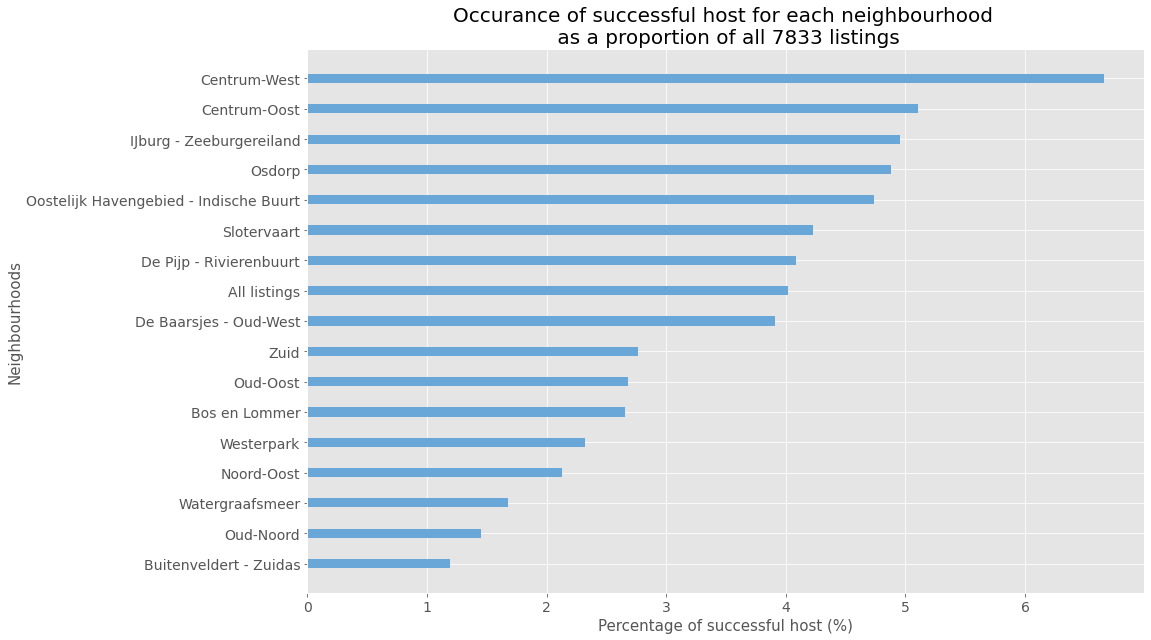

In [30]:
num_listings = len(df)
num_successful = len(df_high_rating)
neighbourhood_type_diff = {'All listings':(num_successful/num_listings*100)}
for key in neighbourhood_high_rating:
    high_rating_neighbourhood, regular_neighbourhood, proportion = print_summary(neighbourhood_high_rating, 
                                                                                 neighbourhood_regular_rating,
                                                                                 key)
    neighbourhood_type_diff[key] = proportion[0] * 100
sorted_neighbourhood_type_diff = get_sorted_dictionary(neighbourhood_type_diff,reverse=False)
sorted_neighbourhood_type_diff
plt.figure(figsize=(15,10))
neighbourhoods = list(sorted_neighbourhood_type_diff.keys())
neighbourhoods
percentages = list(sorted_neighbourhood_type_diff.values())
percentages
plt.barh(neighbourhoods,percentages,color='#6AA7D9',height=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Percentage of successful host (%)',fontsize=15)
plt.ylabel('Neighbourhoods',fontsize=15)
plt.title('Occurance of successful host for each neighbourhood \n as a proportion of all 7833 listings',fontsize=20)

In [31]:
top_3_neighbourhoods = df_high_rating.neighbourhood_cleansed.value_counts()[:3]
top_3_neighbourhoods

Centrum-West              95
Centrum-Oost              47
De Baarsjes - Oud-West    47
Name: neighbourhood_cleansed, dtype: int64

Text(0.5, 1.0, 'Number of successful host for each neighbourhood')

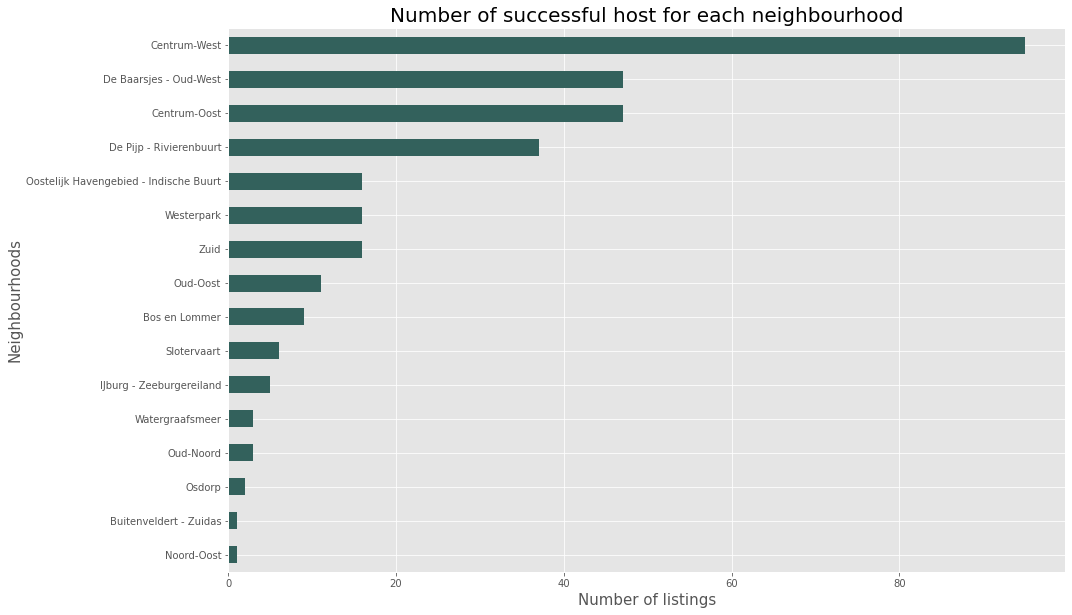

In [32]:
top_neighbourhoods = df_high_rating.neighbourhood_cleansed.value_counts().sort_values(ascending=True)
top_neighbourhoods.plot(kind='barh',color='#33615C',figsize=(15,10))
plt.xlabel('Number of listings',fontsize=15)
plt.ylabel('Neighbourhoods',fontsize=15)
plt.title('Number of successful host for each neighbourhood',fontsize=20)

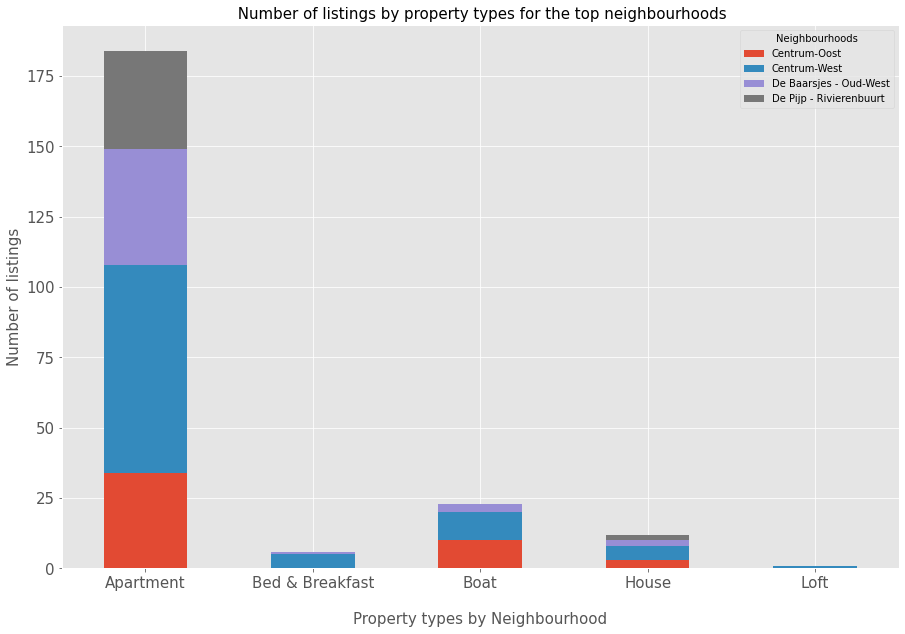

In [38]:
#Take the top 3 neighbourhoods
top_neighbourhood_df = df_high_rating[(df_high_rating.neighbourhood_cleansed=='Centrum-West') |
              (df_high_rating.neighbourhood_cleansed=='De Baarsjes - Oud-West') |
               (df_high_rating.neighbourhood_cleansed=='Centrum-Oost')|
                (df_high_rating.neighbourhood_cleansed=='De Pijp - Rivierenbuurt')]

top_4_groupby = top_neighbourhood_df.groupby(['property_type', 'neighbourhood_cleansed'])['property_type'].count().sort_values().unstack()
top_4_groupby.sort_values(by='property_type').plot(kind='bar', 
                                         stacked=True,
                                         figsize=(15,10),
                                         sort_columns=True,
                                         fontsize=15,
                                         legend=True)
    
plt.xlabel('\nProperty types by Neighbourhood',fontsize=15)
plt.ylabel('Number of listings',fontsize=15)
plt.xticks(rotation=0)
plt.title(' Number of listings by property types for the top neighbourhoods',fontsize=15)
plt.legend(title='Neighbourhoods')

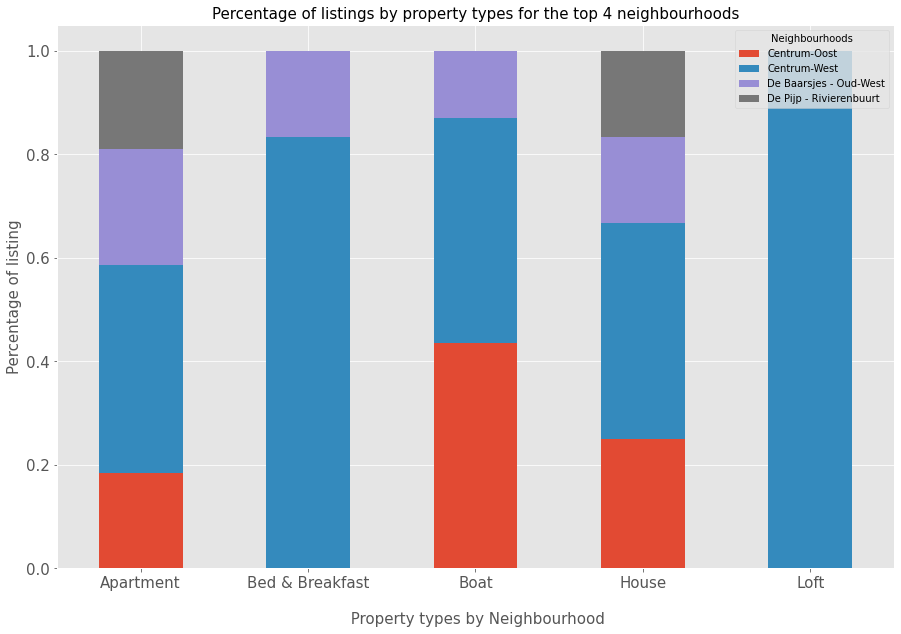

In [41]:
norm_top_4_groupby = top_4_groupby

for index,row in norm_top_4_groupby.iterrows():
    tot = np.sum(row)
    for i in range(len(row)):        
        row[i] = row[i]/tot

norm_top_4_groupby.plot(kind='bar',stacked=True,figsize=(15,10),sort_columns=True,fontsize=15)

plt.xlabel('\n Property types by Neighbourhood',fontsize=15)
plt.ylabel('Percentage of listing',fontsize=15)
plt.xticks(rotation=0)
plt.title('Percentage of listings by property types for the top 4 neighbourhoods',fontsize=15)
plt.legend(title='Neighbourhoods')

How long will it take for me to be a successful host?

In [32]:
df_high_rating.loc[:,'host_since_year':'host_since_anniversary']

,host_since_year,host_since_anniversary
12,2009,7/22
13,2009,8/18
15,2009,9/29
17,2009,10/1
24,2009,12/1
...,...,...
6662,2014,8/13
6911,2014,9/24
7025,2014,10/13
7143,2014,11/5


In [43]:
df_high_rating_split = df_high_rating['host_since_anniversary'].apply(lambda x:x.split('/'))
df_high_rating_months = df_high_rating_split.str[0].astype(int)
df_high_rating_days = df_high_rating_split.str[1].astype(int)
df_high_rating['host_since_days'] = (2016 - df_high_rating['host_since_year'])* 365 + df_high_rating_months * 30 + df_high_rating_days
df_high_rating

<ipython-input-43-496a9afec34d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_rating['host_since_days'] = (2016 - df_high_rating['host_since_year'])* 365 + df_high_rating_months * 30 + df_high_rating_days


,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,country,latitude,longitude,...,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,price_per_bedroom,host_since_days
12,26919,Hugo,2009,7/22,98558,Centrum-Oost,Amsterdam,Netherlands,52.369596,4.899069,...,145,1,0,3,within an hour,1.00,19,99.0,145.000000,2787
13,32366,Sabine & Sander,2009,8/18,9693,Centrum-West,Amsterdam,Netherlands,52.378017,4.892703,...,132,2,30,4,within a day,0.90,34,99.0,132.000000,2813
15,42212,Miguel,2009,9/29,280105,Centrum-West,Amsterdam,Netherlands,52.380300,4.885144,...,180,1,65,2,within an hour,0.96,18,99.0,inf,2854
17,42725,Marco,2009,10/1,933385,De Baarsjes - Oud-West,Amsterdam,Netherlands,52.367614,4.866895,...,82,2,0,2,within a few hours,1.00,19,98.0,82.000000,2856
24,59059,Marius,2009,12/1,75583,Slotervaart,Amsterdam,Netherlands,52.365221,4.838338,...,35,1,30,2,within an hour,1.00,107,99.0,35.000000,2916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,19947214,Roeland,2014,8/13,3864342,De Pijp - Rivierenbuurt,Amsterdam,Netherlands,52.353632,4.889189,...,120,1,25,2,within an hour,1.00,19,98.0,120.000000,983
6911,21725610,Hadewych,2014,9/24,4187658,Centrum-West,Amsterdam,Netherlands,52.369560,4.881757,...,275,2,20,2,within a few hours,0.91,19,98.0,91.666667,1024
7025,22504763,Vanda,2014,10/13,4334364,Centrum-Oost,Amsterdam,Netherlands,52.362818,4.906078,...,135,2,20,2,within a few hours,1.00,22,98.0,67.500000,1043
7143,23368172,Brian,2014,11/5,4506195,Bos en Lommer,Amsterdam,Netherlands,52.379135,4.845423,...,70,1,0,2,within a few hours,0.92,16,98.0,inf,1065


The 95% confidence interval is between 2410 days and 643 days


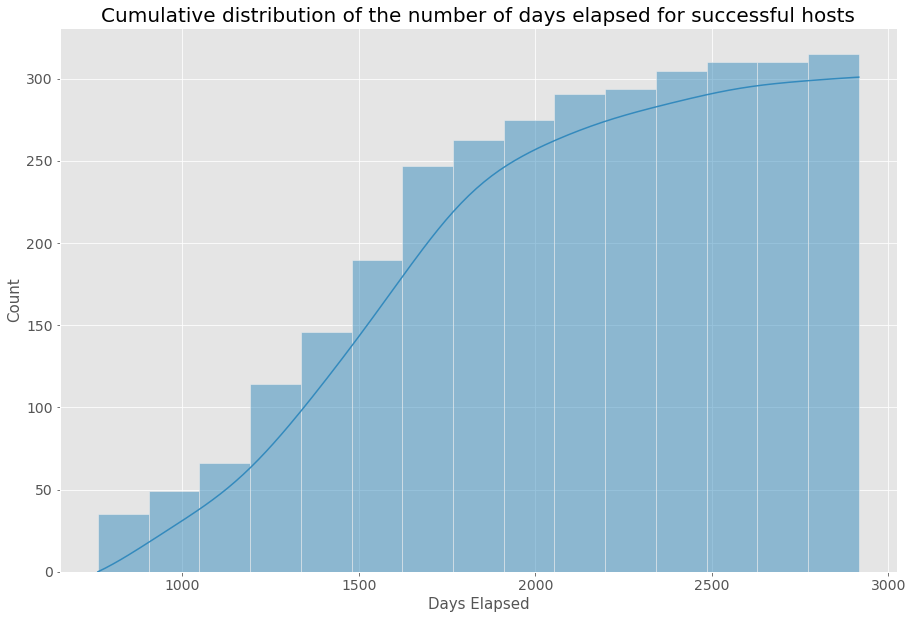

In [44]:
plt.figure(figsize=(15,10))
sns.histplot(data=df_high_rating,x='host_since_days',cumulative=True,kde=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Cumulative distribution of the number of days elapsed for successful hosts', fontsize=20)
plt.xlabel('Days Elapsed', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
ci_pos=df_high_rating['host_since_days'].mean() + 1.96* df_high_rating['host_since_days'].std()
ci_neg= df_high_rating['host_since_days'].mean() - 1.96 * df_high_rating['host_since_days'].std()
print("The 95% confidence interval is between {pos:.0f} days and {neg:.0f} days".format(pos=ci_pos,neg=ci_neg))

It seems like it will take anywhere between 2 years to 6 years to be a successful host.

In [35]:
conclusion = df_high_rating[(df_high_rating.property_type =='Boat') & (df_high_rating.neighbourhood_cleansed=='De Baarsjes - Oud-West')]
conclusion.price_per_bedroom.mean()

118.66666666666667

In [51]:
df[(df.property_type=='Boat')&(df.neighbourhood_cleansed=='De Pijp - Rivierenbuurt')]

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,country,latitude,longitude,...,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating
51,82145,Wim,2010,2/17,4069573,De Pijp - Rivierenbuurt,Amsterdam,Netherlands,52.345304,4.911874,...,6.0,Real Bed,206,4,50,3,within a few hours,1.0,1,40.0
52,82145,Wim,2010,2/17,948808,De Pijp - Rivierenbuurt,Amsterdam,Netherlands,52.352804,4.908386,...,3.0,Real Bed,140,2,35,3,within a few hours,1.0,10,83.0
73,125667,MichÃ¨le,2010,5/16,4052965,De Pijp - Rivierenbuurt,Amsterdam,Netherlands,52.349829,4.887147,...,1.0,Real Bed,100,1,0,3,within an hour,1.0,31,90.0
453,721345,King,2011,6/20,4281373,De Pijp - Rivierenbuurt,Amsterdam,Netherlands,52.357004,4.898888,...,4.0,Real Bed,160,4,50,1,within a few hours,1.0,18,93.0
1428,2531171,Boat People,2012,6/3,1905423,De Pijp - Rivierenbuurt,Amsterdam,Netherlands,52.352760,4.908623,...,4.0,Real Bed,210,4,20,6,within a few hours,1.0,13,94.0
5632,14049960,Dennis,2014,4/8,3163509,De Pijp - Rivierenbuurt,Amsterdam,Netherlands,52.358757,4.904624,...,5.0,Real Bed,150,0,0,3,within an hour,1.0,8,98.0
5784,14617008,Martin,2014,4/23,2858805,De Pijp - Rivierenbuurt,Amsterdam,Netherlands,52.352045,4.908539,...,5.0,Real Bed,175,2,25,2,within an hour,1.0,3,93.0
7276,24279237,Sandra,2014,11/29,4696241,De Pijp - Rivierenbuurt,Amsterdam,Netherlands,52.351414,4.909383,...,6.0,Real Bed,130,2,30,1,within a few hours,1.0,4,95.0


In [52]:
df[(df.property_type=='Boat')&(df.neighbourhood_cleansed=='De Baarsjes - Oud-West')]

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,country,latitude,longitude,...,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating
37,77484,Annelies,2010,2/4,1756765,De Baarsjes - Oud-West,Amsterdam,Netherlands,52.363186,4.867270,...,3.0,Real Bed,180,4,40,3,within a few hours,1.00,35,94.0
38,77484,Annelies,2010,2/4,743666,De Baarsjes - Oud-West,Amsterdam,Netherlands,52.369863,4.872519,...,4.0,Real Bed,200,4,40,3,within a few hours,1.00,72,95.0
42,77484,Annelies,2010,2/4,5275545,De Baarsjes - Oud-West,Amsterdam,Netherlands,52.361294,4.858444,...,3.0,Real Bed,120,2,30,3,within a few hours,1.00,2,90.0
44,77484,Annelies,2010,2/4,5234498,De Baarsjes - Oud-West,Amsterdam,Netherlands,52.372238,4.871811,...,2.0,Real Bed,120,2,30,3,within a few hours,1.00,0,0.0
144,227530,Klaas,2010,9/7,49790,De Baarsjes - Oud-West,Amsterdam,Netherlands,52.362664,4.861032,...,2.0,Real Bed,199,2,40,2,within a few hours,1.00,70,99.0
217,306192,Conny,2010,12/1,64736,De Baarsjes - Oud-West,Amsterdam,Netherlands,52.363481,4.867834,...,1.0,Real Bed,110,1,0,3,within a day,1.00,29,96.0
623,1151745,Mario,2011,9/13,221943,De Baarsjes - Oud-West,Amsterdam,Netherlands,52.365637,4.876398,...,3.0,Real Bed,150,2,25,3,within an hour,1.00,104,93.0
687,1266717,Nanne & Nick,2011,10/9,4889293,De Baarsjes - Oud-West,Amsterdam,Netherlands,52.370385,4.872959,...,2.0,Real Bed,159,2,35,3,within a few hours,0.96,7,100.0
1089,1899873,Liz,2012,3/11,378110,De Baarsjes - Oud-West,Amsterdam,Netherlands,52.369662,4.875245,...,2.0,Real Bed,119,2,30,3,within a few hours,0.90,107,98.0
1634,2963123,Juul,2012,7/17,598909,De Baarsjes - Oud-West,Amsterdam,Netherlands,52.369450,4.870925,...,4.0,Real Bed,275,4,40,3,within an hour,0.80,22,98.0
